In [1]:
from dataloader import customDataset, create_dataloader, get_sample_weights
from torchvision.transforms import Compose, Resize, Normalize, ToTensor, RandomResizedCrop, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter
from torch.utils.data import random_split, DataLoader, WeightedRandomSampler

transforms = Compose([
    # RandomResizedCrop(size=(256, 256), scale=(0.1, 0.25)),
    Resize((256, 256)), # Resize images
    # RandomHorizontalFlip(), 
    # RandomVerticalFlip(), 
    # ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # value is chosen uniformly form [1-v, 1+v]
    # ToTensor(), # Convert images to tensors
    # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images
])

# Directory containing your dataset
directory = r"D:\omer\poverty_mapping_data\clipped_data_survey"

dataset = customDataset(directory=directory, transform=transforms, mode="survey")


c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# train/test split
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [3]:
print(test_size)

259


In [4]:
# setup model
from models import load_resnet50_for_regression

model = load_resnet50_for_regression(state_dict_path=r"D:\omer\poverty-mapping-TL\last_model_survey.pth", freeze_weights=True)

c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = load_resnet50_for_regression(state_dict_path=r"D:\omer\poverty-mapping-TL\best_model.pth", freeze_weights=True)
model = model.to(device)

# Specify the loss function and optimizer
criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of epochs to train for
num_epochs = 35
best_test_loss = float('inf')
test_loss = 0
with torch.no_grad():
    for inputs, targets in tqdm(test_dataloader):
        print(inputs.shape, targets.shape)
        inputs = inputs.to(device)
        targets = targets.to(device).float()

        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))

        test_loss += loss.item()

test_loss = test_loss / len(test_dataloader)

print(f'Test Loss: {test_loss:.4f}')

print('Testing complete')


  0%|          | 0/65 [00:00<?, ?it/s]


AttributeError: shape

In [20]:

np.sqrt(0.0236)

0.15362291495737215

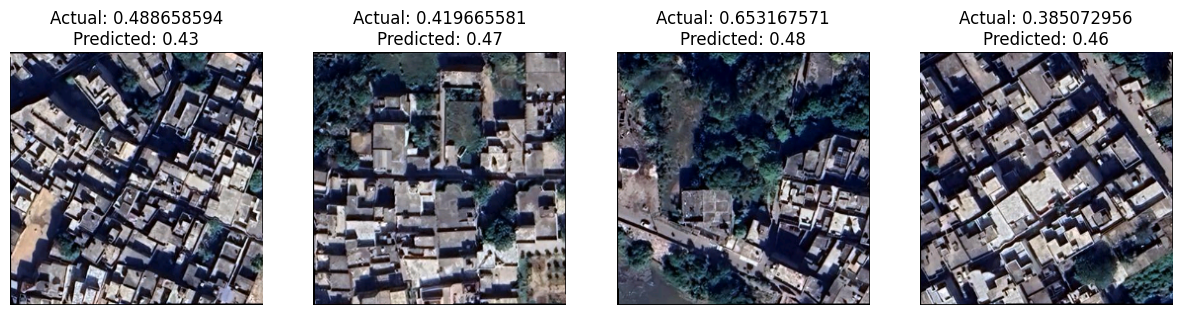

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images, actual values, and predictions
def visualize_predictions(dataloader, model, num_images=4):
    model.eval()  # Set the model to evaluation mode
    images, actuals = next(iter(dataloader))  # Get one batch from the dataloader
    with torch.no_grad():
        images = images.to(device)
        outputs = model(images)
        predictions = outputs.squeeze(1)  # Adjust depending on your output shape

    # Move images and predictions to CPU for plotting
    images = images.cpu()
    predictions = predictions.cpu()

    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        actual = actuals[i].item()
        predicted = predictions[i].item()
        axs[i].imshow(img)
        axs[i].set_title(f'Actual: {actual}\nPredicted: {predicted:.2f}')
        axs[i].axis('off')

    plt.show()



In [21]:
def visualize_predictions(images, actuals, model, num_images=4):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        images = images.to(device)
        outputs = model(images)
        predictions = outputs.squeeze(1)  # Adjust depending on your output shape

    # Move images and predictions to CPU for plotting
    images = images.cpu()
    predictions = predictions.cpu()

    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        actual = actuals[i].item()
        predicted = predictions[i].item()
        axs[i].imshow(img)
        axs[i].set_title(f'Actual: {actual}\nPredicted: {predicted:.2f}')
        axs[i].axis('off')

    plt.show()

In [58]:
testing=iter(test_dataloader)

In [59]:
print(len(test_dataloader))

65


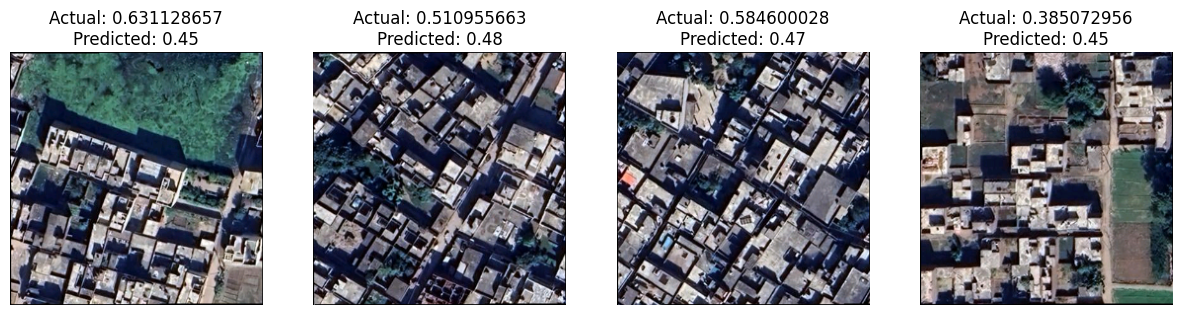

: 

In [102]:




images, actuals = next(testing)
visualize_predictions(images, actuals, model, num_images=4)

In [4]:
import torch
from models import load_resnet50_for_regression
from dataloader import customDataset, create_dataloader, get_sample_weights
from torchvision.transforms import Compose, Resize, Normalize, ToTensor, RandomResizedCrop, RandomHorizontalFlip, RandomVerticalFlip, ColorJitter
from torch.utils.data import random_split, DataLoader, WeightedRandomSampler
## test on city grid
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = load_resnet50_for_regression(state_dict_path=r"D:\omer\poverty-mapping-TL\best_model.pth", freeze_weights=True)
model = model.to(device)
transforms = Compose([
    # ToTensor(), # Convert images to tensors
    Resize((256, 256), antialias=True), # Resize images
    
    # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images
])

import rasterio
from rasterio.mask import mask
import geopandas as gpd
from shapely.geometry import mapping
import torchvision.transforms.functional as TF
from tqdm import tqdm
import numpy as np 

# Load the shapefile
polygons = gpd.read_file(r"D:\omer\poverty_mapping_data\Survey_sat_images\100mSquares_lessAreaRe.shp")
predictions_list = []
representation_array = np.zeros(shape=(len(polygons), 2048))
# Open the raster file
with rasterio.open(r"D:\omer\poverty mapping\data\sialkot_combined\sialkot_zoom_20.tif") as src:
    for index, row in tqdm(polygons.iterrows(), total=len(polygons)):
        # Get the polygon geometry and transform to GeoJSON format
        geom = [mapping(row['geometry'])]
        # Clip the raster with the polygon using rasterio's mask function
        out_image, out_transform = mask(src, geom, crop=True)
        with torch.no_grad():
            # print(out_image.shape)  # (3, 339, 400)
            # out_image = TF.to_tensor(out_image)
            # print(out_image.shape)  # torch.Size([400, 3, 339])
            # out_image = transforms(out_image)
            out_image = torch.tensor(out_image).float()
            out_image = transforms(out_image.unsqueeze(0).to(device))
            representation = model(out_image)
            # predictions = outputs.squeeze(1)
            # predictions_list.append(predictions.item())
            representation_array[index] = representation.cpu().numpy()
            # print(predictions.item())
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform,
        })
        # if index%100==0:
        #     print(index, "done")
        # Save the clipped raster to a new file
        # with rasterio.open(f'D:\omer\poverty_mapping_data\clipped_data_survey\{c, index}.tif', 'w', **out_meta) as dest:
            # dest.write(out_image)
print("done")
# After the loop
# polygons['predictions'] = predictions_list

# Save the updated GeoDataFrame to a new shapefile
# polygons.to_file(r"D:\omer\poverty_mapping_data\Survey_sat_images\100mSquares_lessArea_with_predictions.shp")
# print("saved!")

c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 280/280 [00:05<00:00, 47.10it/s] 

done


In [7]:
import numpy as np
print(representation_array.shape)
print(representation_array)

(280, 2048)
[[0.11584228 0.14487517 0.11848283 ... 0.14318067 0.14755592 0.13994396]
 [0.11495204 0.137402   0.11611818 ... 0.13989435 0.14427806 0.1374159 ]
 [0.10293344 0.11826591 0.10210788 ... 0.12899384 0.1336882  0.12625518]
 ...
 [0.11477795 0.13833418 0.11743169 ... 0.1399886  0.14742844 0.13735986]
 [0.11473318 0.13569646 0.11604559 ... 0.13974892 0.14511493 0.13715118]
 [0.11475168 0.14137784 0.11622991 ... 0.1401834  0.14422163 0.13752477]]


In [10]:
from sklearn.cluster import KMeans

# After the loop, convert representations to a NumPy array 
representations_array = representation_array

# Choose a suitable number of clusters (you might need to experiment)
n_clusters = 2 

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(representations_array)
cluster_labels = kmeans.labels_

# Add cluster labels back to the GeoDataFrame
polygons['cluster'] = cluster_labels
polygons.to_file(r"D:\omer\poverty_mapping_data\Survey_sat_images\100mSquares_lessArea_with_clusters.shp")
print("saved!")


saved!


c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


saved!
